In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel('/kaggle/input/pile-load/Data-2-Copy.xlsx')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.to_csv('/kaggle/working/pile-load.csv', index=False)

In [5]:
df = pd.read_csv('/kaggle/working/pile-load.csv')

In [6]:
df.shape

(100, 9)

In [8]:
df.head(2)

,Pile Material,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m),Pile Capacity (kN)
0,Steel,33.0,28.85,9.82,12.49,20.1,0.1,19.5,1040.0
1,Steel,33.0,29.89,9.73,12.41,27.0,0.1,23.5,1400.0


In [9]:
# Get the column names
column_names = df.columns.tolist()
column_names

['Pile Material',
 'Average Cohesion (kN/m2)',
 'Average Friction angle (°)',
 'Average soil Specific weight (kN/m3)',
 'Average Pile-Soil friction angle (°)',
 'Flap Number',
 'Pile Area (m2)',
 'Pile Length (m)',
 'Pile Capacity (kN)']

In [ ]:
df.dtypes

<Axes: >

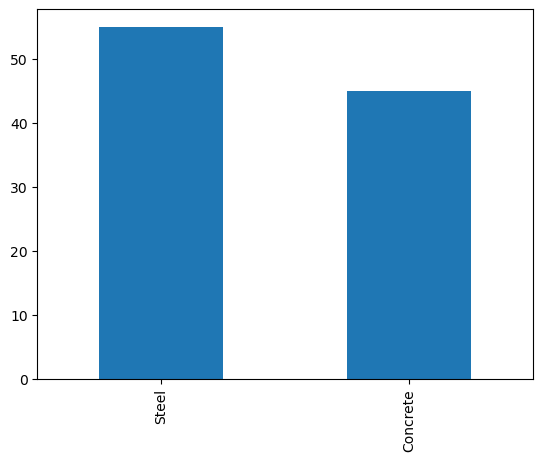

In [10]:
df['Pile Material'].value_counts().plot(kind='bar')

In [11]:
sdf = df[df['Pile Material'] == 'Steel'].copy()
cdf = df[df['Pile Material'] == 'Concrete'].copy()

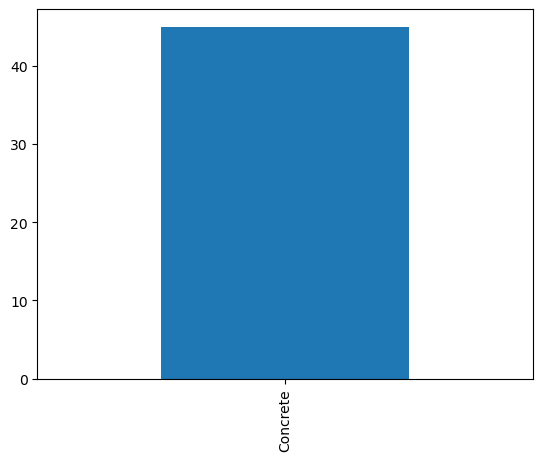

In [12]:
cdf['Pile Material'].value_counts().plot(kind='bar');


# For Steel

In [13]:
sdf.head()

,Pile Material,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m),Pile Capacity (kN)
0,Steel,33.0,28.85,9.82,12.49,20.1,0.1,19.5,1040.0
1,Steel,33.0,29.89,9.73,12.41,27.0,0.1,23.5,1400.0
2,Steel,33.0,28.81,9.82,12.49,20.0,0.1,19.4,990.0
3,Steel,0.0,28.00,9.57,12.27,21.0,0.1,19.5,960.0
4,Steel,0.0,28.00,9.69,12.22,24.0,0.1,23.5,1330.0


In [14]:
sdf.isna().sum()

Pile Material                           0
Average Cohesion (kN/m2)                0
Average Friction angle (°)              0
Average soil Specific weight (kN/m3)    0
Average Pile-Soil friction angle (°)    0
Flap Number                             0
Pile Area (m2)                          0
Pile Length (m)                         0
Pile Capacity (kN)                      0
dtype: int64

In [15]:
sdf.shape

(55, 9)

In [16]:
X = sdf.drop(['Pile Material', 'Pile Capacity (kN)'], axis=1)
y = sdf['Pile Capacity (kN)']

In [17]:
X.head(2)

,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m)
0,33.0,28.85,9.82,12.49,20.1,0.1,19.5
1,33.0,29.89,9.73,12.41,27.0,0.1,23.5


In [18]:
y.head(2)

0    1040.0
1    1400.0
Name: Pile Capacity (kN), dtype: float64

In [19]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR



from sklearn.model_selection import train_test_split

# # Set data
# X = sdf.drop(['Pile Material', 'Pile Capacity (kN)'], axis=1)
# y = sdf['Pile Capacity (kN)']
# # Split the data into training and testing sets

# np.random.seed(71)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# len(X_train), len(X_test), len(y_train), len(y_test)

In [20]:
sdf=sdf.drop(['Pile Material'],axis=1)

In [21]:
from sklearn.model_selection import train_test_split
ys=sdf['Pile Capacity (kN)']

In [37]:
Xs=sdf.drop(['Pile Capacity (kN)'],axis=1)

In [38]:
X_train.head()

,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m)
63,49.8,31.01,11.200,12.47,990.0,1.16,22.5
3,0.0,28.00,9.570,12.27,21.0,0.10,19.5
59,41.1,31.23,11.250,12.78,1610.0,1.16,18.5
76,33.7,0.00,11.432,14.00,306.0,0.16,20.2
56,44.7,31.14,11.240,12.65,1463.0,1.16,20.0


## RandomForestRegressor

In [40]:
X_train,X_test,y_train,y_test=train_test_split(Xs,ys,train_size=0.8,test_size=0.2)
np.random.seed(42)

In [76]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,max_leaf_nodes=40,random_state=42)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9766669556053925

In [98]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)
print(np.array(y_test))

[ 3827.655   4062.08    1078.108   2875.3035 44942.415   5547.1155
  5958.4825  4176.105   5154.166  40984.405   4827.57  ]
[ 4100.   4936.    987.   2648.5 48470.   2750.   6120.   3350.   1330.
 36250.   3585. ]


In [78]:
show_scores(model)

{'training MAE': 894.6746818181819,
 'test MAE': 1688.876409090909,
 'training MAPE': 0.2446860725132668,
 'test MAPE': 0.4669854561922166,
 'training MSE': 2872255.8092422155,
 'test MSE': 5496064.853779885,
 'Training R^2': 0.9745213222736107,
 'Valid R^2': 0.9766669556053925}

In [99]:
y_test

52     4100.0
56     4936.0
33      987.0
93     2648.5
20    48470.0
46     2750.0
26     6120.0
50     3350.0
4      1330.0
21    36250.0
88     3585.0
Name: Pile Capacity (kN), dtype: float64

In [100]:
result = pd.DataFrame(np.c_[y_test, y_pred], columns=['True', 'Prediction'])

In [101]:
result

,True,Prediction
0,4100.0,3827.6550
1,4936.0,4062.0800
2,987.0,1078.1080
3,2648.5,2875.3035
4,48470.0,44942.4150
5,2750.0,5547.1155
6,6120.0,5958.4825
7,3350.0,4176.1050
8,1330.0,5154.1660
9,36250.0,40984.4050


In [102]:
result.to_csv('/kaggle/working/Final_result_random_forest.csv', index=False)

In [88]:
result = pd.read_csv('/kaggle/working/Final_result.csv')

In [89]:
result

,True,Prediction
0,4100.0,3827.6550
1,4936.0,4062.0800
2,987.0,1078.1080
3,2648.5,2875.3035
4,48470.0,44942.4150
5,2750.0,5547.1155
6,6120.0,5958.4825
7,3350.0,4176.1050
8,1330.0,5154.1660
9,36250.0,40984.4050


In [44]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        'training MAE': mean_absolute_error(y_train, train_preds),
        'test MAE': mean_absolute_error(y_test, test_preds),
        
        'training MAPE': mean_absolute_percentage_error(y_train, train_preds),
        'test MAPE': mean_absolute_percentage_error(y_test, test_preds),
        
        'training MSE': mean_squared_error(y_train, train_preds),
        'test MSE': mean_squared_error(y_test, test_preds),
        
        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_test, test_preds)
    }
    return scores

In [45]:
def difference(model):
    prbdf = pd.DataFrame({
        'Prediction': model.predict(X_test),
        'True': np.array(y_test)
    })
    prbdf.plot(kind='bar', figsize = (10, 5))

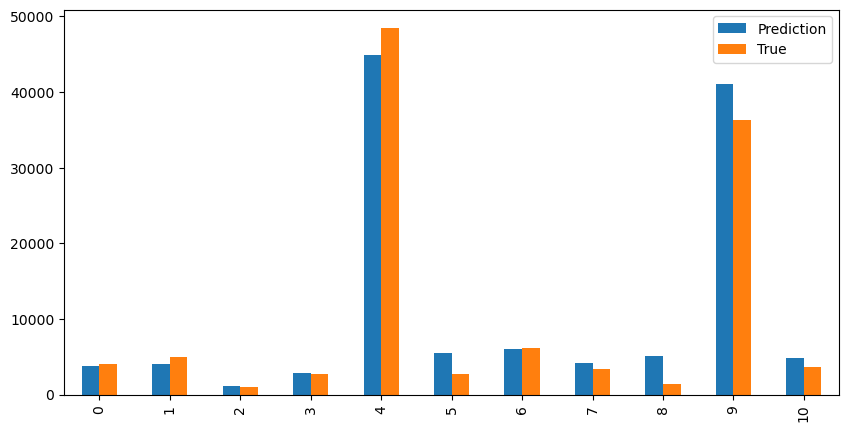

In [47]:
difference(model)

## Linear Regression

In [48]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_test)
print(y_pred)
print(np.array(y_test))

[ 6498.35660927  4352.52660073 -2791.47262401 -2869.43208202
 41374.10335932  6614.67282231  6069.23314198  2740.58092883
  5370.82481738 40991.29234612  5870.05672332]
[ 4100.   4936.    987.   2648.5 48470.   2750.   6120.   3350.   1330.
 36250.   3585. ]


In [50]:
show_scores(lr)

{'training MAE': 2749.9755665803873,
 'test MAE': 3178.7421812343396,
 'training MAPE': 1.1570210165997912,
 'test MAPE': 1.1057433800124974,
 'training MSE': 13676056.260474376,
 'test MSE': 14591636.5497279,
 'Training R^2': 0.8786849594289698,
 'Valid R^2': 0.9380525316817134}

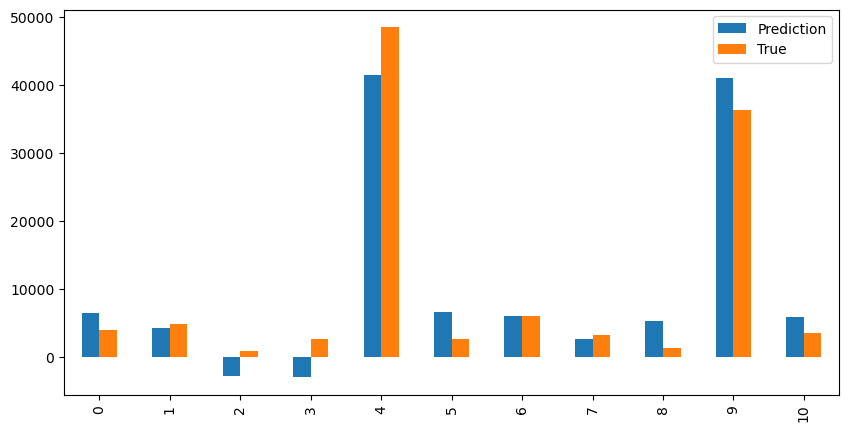

In [51]:
difference(lr)

## XGBoostRegressor

In [103]:
# Create and fit the XGBoost regression model
xr = xgb.XGBRegressor()
xr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [105]:
y_pred = xr.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(xr)

[ 3942.9167  4143.0576  1087.5917  3811.8525 49350.55    2870.0017
  6192.1187  4096.8345  1339.4208 49350.586   3633.2856]
[ 4100.   4936.    987.   2648.5 48470.   2750.   6120.   3350.   1330.
 36250.   3585. ]


{'training MAE': 0.006580699573863636,
 'test MAE': 1562.8879838423295,
 'training MAPE': 2.530072633905364e-06,
 'test MAPE': 0.12896319337070983,
 'training MSE': 8.798729289661755e-05,
 'test MSE': 15908858.69673531,
 'Training R^2': 0.9999999999992195,
 'Valid R^2': 0.9324603846362602}

In [110]:
result = pd.DataFrame(np.c_[y_test, y_pred], columns=['True', 'Prediction'])
result.to_csv('/kaggle/working/Final_result_XGboost.csv', index=False)
rs = pd.read_csv('/kaggle/working/Final_result_cat_boost.csv')
rs

,True,Prediction
0,4100.0,3942.916748
1,4936.0,4143.057617
2,987.0,1087.591675
3,2648.5,3811.852539
4,48470.0,49350.550781
5,2750.0,2870.001709
6,6120.0,6192.118652
7,3350.0,4096.834473
8,1330.0,1339.420776
9,36250.0,49350.585938


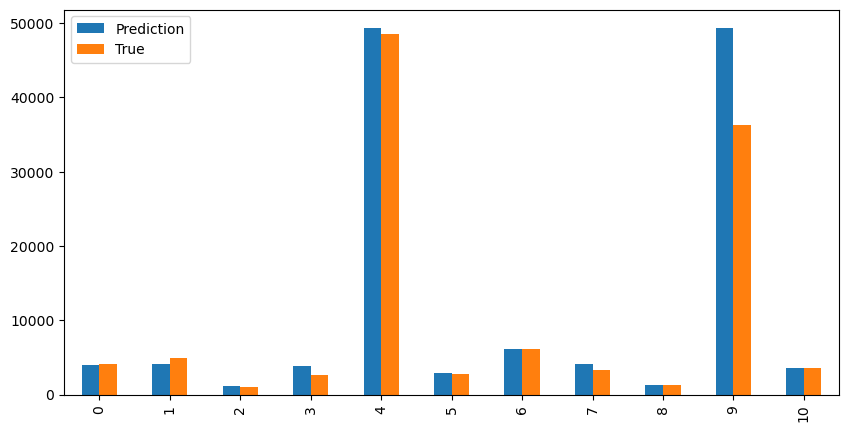

In [107]:
difference(xr)

## CatBoostRegressor

In [55]:
# Loading the BERT Classifier and Tokenizer along with Input module

from IPython.display import clear_output
cr = CatBoostRegressor();
cr.fit(X_train, y_train);
clear_output()

In [90]:
y_pred = cr.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(cr)

[ 3697.85200716  3955.12634689   858.64756858  2480.18704081
 39242.4921969   2861.01338592  6121.62799507  4014.08192476
  1777.57873085 37615.69008284  3762.49271603]
[ 4100.   4936.    987.   2648.5 48470.   2750.   6120.   3350.   1330.
 36250.   3585. ]


{'training MAE': 47.158088254204294,
 'test MAE': 1243.1526977386643,
 'training MAPE': 0.017497578333052436,
 'test MAPE': 0.12212267812278486,
 'training MSE': 3631.5694164615566,
 'test MSE': 8078710.108958086,
 'Training R^2': 0.9999677857430019,
 'Valid R^2': 0.9657025696314623}

In [109]:
result = pd.DataFrame(np.c_[y_test, y_pred], columns=['True', 'Prediction'])
result.to_csv('/kaggle/working/Final_result_cat_boost.csv', index=False)
rs = pd.read_csv('/kaggle/working/Final_result_cat_boost.csv')
rs

,True,Prediction
0,4100.0,3942.916748
1,4936.0,4143.057617
2,987.0,1087.591675
3,2648.5,3811.852539
4,48470.0,49350.550781
5,2750.0,2870.001709
6,6120.0,6192.118652
7,3350.0,4096.834473
8,1330.0,1339.420776
9,36250.0,49350.585938


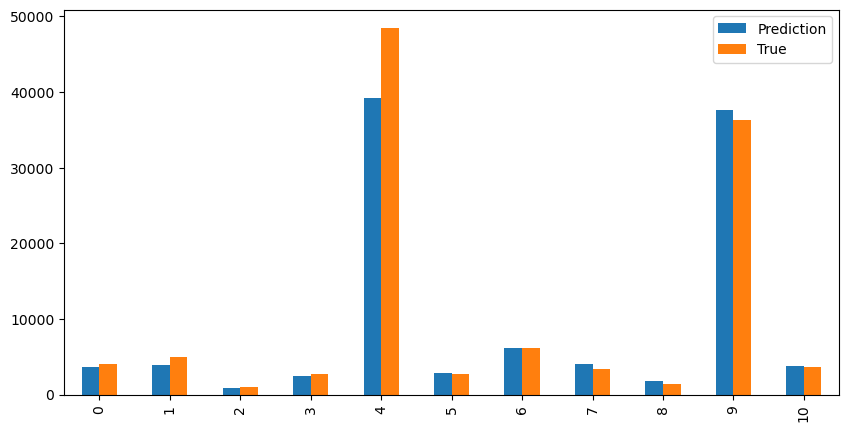

In [57]:
difference(cr)

## SupportVectorRegressor

In [59]:
# Create and fit the SVR model
models= SVR()
models.fit(X_train, y_train)

SVR()

In [60]:
y_pred = models.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(models)

[3511.63957034 3512.20449168 3491.08022475 3492.05225245 3512.11187542
 3491.55042532 3492.64213803 3502.46432555 3491.13885964 3511.92651256
 3508.07856587]
[ 4100.   4936.    987.   2648.5 48470.   2750.   6120.   3350.   1330.
 36250.   3585. ]


{'training MAE': 4120.362606930933,
 'test MAE': 8074.107539437829,
 'training MAPE': 0.7278339053664638,
 'test MAPE': 0.6826385176665649,
 'training MSE': 119434107.4067424,
 'test MSE': 283136464.5388644,
 'Training R^2': -0.05945407869440489,
 'Valid R^2': -0.20203015658994428}

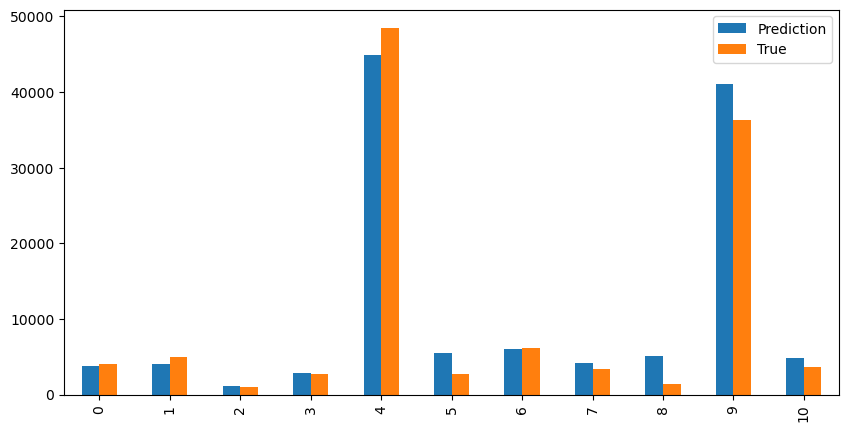

In [61]:
difference(model)

## Differentiate between best model

In [62]:
def shy(model):
    test_preds = model.predict(X_test)
    scores = {
        'R^2': r2_score(y_test, test_preds),
        'MAE': mean_absolute_error(y_test, test_preds),
        'MAPE': mean_absolute_percentage_error(y_test, test_preds)
        
    }
    return scores

In [63]:
shy(model)

{'R^2': 0.9766669556053925,
 'MAE': 1688.876409090909,
 'MAPE': 0.4669854561922166}

In [64]:
cmp = pd.DataFrame({
    'RFRegressor': shy(model),
    'LinearRegression': shy(lr),
    'XGBRegressor': shy(xr),
    'CatBoostRegressor': shy(cr),
    'SVRegressor': shy(models)
})

In [65]:
cmp

,RFRegressor,LinearRegression,XGBRegressor,CatBoostRegressor,SVRegressor
R^2,0.976667,0.938053,0.932460,0.965703,-0.202030
MAE,1688.876409,3178.742181,1562.887984,1243.152698,8074.107539
MAPE,0.466985,1.105743,0.128963,0.122123,0.682639


In [66]:
colors = ['red', 'green', 'blue', 'yellow', 'violet']
colors

['red', 'green', 'blue', 'yellow', 'violet']

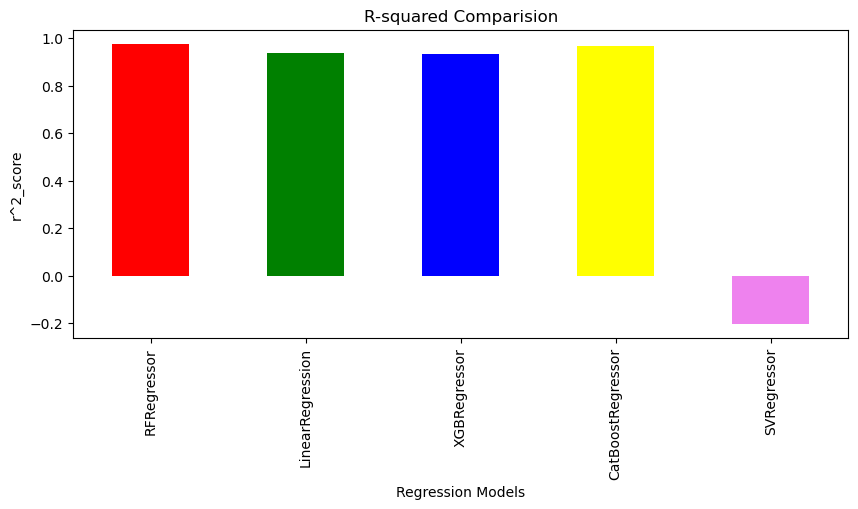

In [67]:
cmp.iloc[0].plot(kind='bar', figsize=(10,4), color=colors, title='R-squared Comparision')
plt.xlabel('Regression Models')
plt.ylabel('r^2_score')
plt.show()

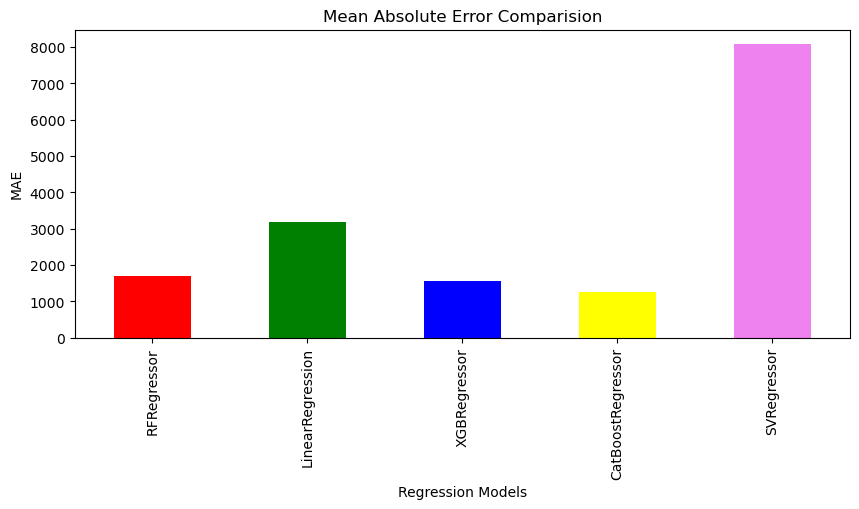

In [68]:
cmp.iloc[1].plot(kind='bar', figsize=(10,4), color=colors, title='Mean Absolute Error Comparision')
plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.show()

In [ ]:
cmp.iloc[2].plot(kind='bar', figsize=(10,4), color=colors, title='Mean Absolute Percentage Error Comparision')
plt.xlabel('Regression Models')
plt.ylabel('MAPE')
plt.show()

author:Tanbeer Jubaer Oitik

## Cross Val Score  -->

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def check_cv(model):
    # Perform cross-validation and get the R-squared scores
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Cross-Validation R-squared scores:", scores)
    print("Average R-squared score:", scores.mean())
    return scores

## rfc

In [ ]:
check_cv(model)

## LInear Regression

In [ ]:
check_cv(lr)

## XGBReg..

In [ ]:
check_cv(xr)

## CatBoost

In [ ]:
ans = check_cv(cr)
clear_output()

In [ ]:
print(ans)

## Feature Importance

In [ ]:
model.feature_importances_

In [ ]:
# function to plot feature importance
def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({
        'features': columns,
        'feature_importance': importance})
        .sort_values('feature_importance', ascending=False)
        .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importance'][:n])
    ax.set_ylabel('Features', color='orange')
    ax.set_xlabel('Feature Importance', color='orange')
    ax.invert_yaxis()
    plt.title('Feature Importance Bar Graph', color='darkblue')

In [ ]:
plot_features(X_train.columns, model.feature_importances_)

In [ ]:
plot_features(X_train.columns, xr.feature_importances_)

In [ ]:
plot_features(X_train.columns, cr.feature_importances_)